## Binomial Tree Pricing for Vanilla European Options

This notebook implements a simple binomial tree method to price vanilla European options.

We use:

- **CRR model** for up/down movements
- **Backward induction** to evaluate the option price at time 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

sys.path.append(os.path.abspath("../../"))

from pricing.bsm import bsm_price
from pricing.binomial_tree import binomial_crr_price

In [2]:
# Parameters
S0 = 100  # Spot price
K = 100  # Strike price
T = 1.0  # Time to maturity
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
N = 100  # Number of time steps

In [3]:
# Binomial Prices
call_bin = binomial_crr_price(S0, K, r, sigma, T, N, is_call=True)
put_bin = binomial_crr_price(S0, K, r, sigma, T, N, is_call=False)

# Black-Scholes analytic
call_bsm = bsm_price(S0, K, r, sigma, T, is_call=True)
put_bsm = bsm_price(S0, K, r, sigma, T, is_call=False)

print(f"Call  :  Binomial = {call_bin:.4f}   | BSM = {call_bsm:.4f}")
print(f"Put   :  Binomial = {put_bin :.4f}    | BSM = {put_bsm :.4f}")

Call  :  Binomial = 10.4306   | BSM = 10.4506
Put   :  Binomial = 5.5536    | BSM = 5.5735


---

### Binomial Tree Convergence vs Black-Scholes Price

This section visualizes how the binomial tree method converges to the analytical Black-Scholes-Merton (BSM) price as we increase the number of steps (`N`). We plot the binomial price for increasing `N` and compare it with the constant BSM price to evaluate convergence.

In [4]:
# Convergence Loop

steps = np.arange(1, 301, 5)
binomial_prices = []

for N in steps:
    price = binomial_crr_price(S0, K, r, sigma, T, N, is_call=True)
    binomial_prices.append(price)

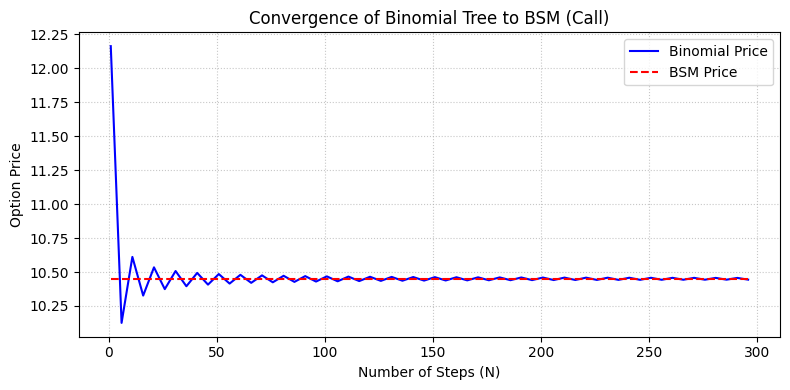

In [5]:
# --- Convergence of Binomial Tree to BSM (Call) ---

# plot
plt.figure(figsize=(8, 4))
plt.plot(steps, binomial_prices, label="Binomial Price", color="blue")
plt.hlines(
    call_bsm,
    steps[0],
    steps[-1],
    colors="red",
    linestyles="dashed",
    label="BSM Price",
    lw=1.5,
)

plt.xlabel("Number of Steps (N)")
plt.ylabel("Option Price")
plt.title("Convergence of Binomial Tree to BSM (Call)")
plt.legend(loc="upper right")
plt.grid(True, ls=":", alpha=0.7)
plt.tight_layout()
plt.show()

### 🔍 Observation

As the number of steps in the binomial tree increases, the computed price converges toward the analytical Black-Scholes price. This validates the accuracy of the binomial tree method and highlights its convergence behavior.

The convergence is slower for fewer steps but improves significantly beyond ~100 steps.